In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Load Data

In [5]:
train_data = pd.read_csv('./train.csv')
test_data = pd.read_csv('./test.csv')

In [6]:
len(train_data) + len(test_data)

2000000

In [7]:
train_data = pd.concat([train_data, test_data])

# preprocessing Data

In [8]:
train_data.Cancelled.value_counts()

Cancelled
0    2000000
Name: count, dtype: int64

In [9]:
test_data.Cancelled.value_counts()

Cancelled
0    1000000
Name: count, dtype: int64

In [10]:
train_data.Diverted.value_counts()

Diverted
0    2000000
Name: count, dtype: int64

In [11]:
test_data.Diverted.value_counts()

Diverted
0    1000000
Name: count, dtype: int64

In [12]:
train_data.drop(['Cancelled'],axis=1,inplace=True)
train_data.drop(['Diverted'],axis=1,inplace=True)
# 이 두 컬럼은 모두 0, 필요없으므로 제거
test_data.drop(['Cancelled'],axis=1,inplace=True)
test_data.drop(['Diverted'],axis=1,inplace=True)
# 이 두 컬럼은 모두 0, 필요없으므로 제거

In [13]:
train_data.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 2000000 entries, 0 to 999999
Data columns (total 17 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   ID                        2000000 non-null  object 
 1   Month                     2000000 non-null  int64  
 2   Day_of_Month              2000000 non-null  int64  
 3   Estimated_Departure_Time  1781997 non-null  float64
 4   Estimated_Arrival_Time    1781912 non-null  float64
 5   Origin_Airport            2000000 non-null  object 
 6   Origin_Airport_ID         2000000 non-null  int64  
 7   Origin_State              1784480 non-null  object 
 8   Destination_Airport       2000000 non-null  object 
 9   Destination_Airport_ID    2000000 non-null  int64  
 10  Destination_State         1784398 non-null  object 
 11  Distance                  2000000 non-null  float64
 12  Airline                   1784553 non-null  object 
 13  Carrier_Code(IATA)        1782017

In [14]:
len(train_data.dropna())

113787

# fill Nan value

## state

In [16]:
airports = dict()
# airprots : id

In [17]:
for _,v in tqdm(train_data.loc[:,['Origin_Airport','Origin_Airport_ID']].drop_duplicates().iterrows()):
    oai = v['Origin_Airport_ID']
    oa = v['Origin_Airport']
    if not airports.get(oa):
        airports[oa] = oai
    elif airports[oa] != oai:
        print(oa, oai)

379it [00:00, 22390.26it/s]


In [18]:
for i,v in tqdm(train_data.loc[:,['Destination_Airport','Destination_Airport_ID']].drop_duplicates().iterrows()):
    dai = v['Destination_Airport_ID']
    da = v['Destination_Airport']
    if not airports.get(da):
        airports[da] = dai
    elif airports[da] != dai:
        print(da, dai)

378it [00:00, 22258.76it/s]


In [20]:
len(airports) # 375 개 airport , ID 와 불일치 없음

379

In [21]:
airports_state = dict()
# airprots : state

In [22]:
airports_state['RIW'] = 'Wyoming'
airports_state['SHR'] = 'Wyoming'
airports_state['DDC'] = 'Kansas'
airports_state['DEC'] = 'Illinois'

In [18]:
# train_data.loc[train_data['Origin_State'].isna(),'Origin_State'] = ''
# train_data.loc[train_data['Destination_State'].isna(),'Destination_State'] = ''

In [23]:
for i,v in tqdm(train_data.loc[~train_data['Origin_State'].isna(),['Origin_Airport','Origin_State']].drop_duplicates().iterrows()):
    os = v['Origin_State']
    oa = v['Origin_Airport']
    if not airports_state.get(oa):
        airports_state[oa] = os
    elif airports_state[oa] != os:
        print(oa, os,airports_state[oa])

375it [00:00, 23502.94it/s]


In [25]:
for i,v in tqdm(train_data.loc[~train_data['Destination_State'].isna(),['Destination_Airport','Destination_State']].drop_duplicates().iterrows()):
    ds = v['Destination_State']
    da = v['Destination_Airport']
    if not airports_state.get(da):
        airports_state[da] = ds
    elif airports_state[da] != ds:
        print(da, ds,airports_state[da])

374it [00:00, 23397.61it/s]


In [26]:
#109015 개 Origin_State null값 있음
#109079 개 Destination_State null 값 있음

In [29]:
train_data.loc[train_data['Origin_State'].isna() ,'Origin_State'] = train_data.loc[train_data['Origin_State'].isna(),'Origin_Airport'].apply(lambda x : airports_state.get(x))

In [30]:
train_data.loc[train_data['Destination_State'].isna() ,'Destination_State'] = train_data.loc[train_data['Destination_State'].isna(),'Destination_Airport'].apply(lambda x : airports_state.get(x))

In [24]:
# State 정보 채워줌

In [32]:
train_data.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 2000000 entries, 0 to 999999
Data columns (total 17 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   ID                        2000000 non-null  object 
 1   Month                     2000000 non-null  int64  
 2   Day_of_Month              2000000 non-null  int64  
 3   Estimated_Departure_Time  1781997 non-null  float64
 4   Estimated_Arrival_Time    1781912 non-null  float64
 5   Origin_Airport            2000000 non-null  object 
 6   Origin_Airport_ID         2000000 non-null  int64  
 7   Origin_State              2000000 non-null  object 
 8   Destination_Airport       2000000 non-null  object 
 9   Destination_Airport_ID    2000000 non-null  int64  
 10  Destination_State         2000000 non-null  object 
 11  Distance                  2000000 non-null  float64
 12  Airline                   1784553 non-null  object 
 13  Carrier_Code(IATA)        1782017

 > Origin_State, Destination_State는 100% 정확한 정보를 채울수 있었음

In [33]:
len(train_data.dropna())

143245

## airline

> Airline과 Carrier_ID(DOT)가 일치한다는 가정하에 채우기 시작

In [34]:
airline = dict()
# airline : id

In [35]:
len(set(train_data['Airline']))

29

In [36]:
for i,v in tqdm(train_data.loc[~train_data['Airline'].isna() * ~train_data['Carrier_ID(DOT)'].isna(),['Airline','Carrier_ID(DOT)']].drop_duplicates().iterrows()):
    al = v['Airline']
    ci = v['Carrier_ID(DOT)']
    if not airline.get(al):
        airline[al] = ci
    elif airline[al] != ci:
        print(ci, al, airline[al])
        break

28it [00:00, 14054.63it/s]


In [37]:
(train_data['Carrier_ID(DOT)'].isna() * ~train_data['Airline'].isna() ).sum()
# id 없고 airline 있는거 개수

194577

In [43]:
train_data.loc[train_data['Carrier_ID(DOT)'].isna() * ~train_data['Airline'].isna() ,'Carrier_ID(DOT)'] = train_data.loc[train_data['Carrier_ID(DOT)'].isna() * ~train_data['Airline'].isna() ,'Airline'].apply(lambda x : airline.get(x))

In [44]:
(~train_data['Carrier_ID(DOT)'].isna() * train_data['Airline'].isna() ).sum()
# id 있고 airline없는거 개수

0

In [45]:
airline_reverse = dict([(v, k) for k,v in airline.items()])
# id : airline

In [46]:
train_data.loc[~train_data['Carrier_ID(DOT)'].isna() * train_data['Airline'].isna() ,'Airline'] = train_data.loc[~train_data['Carrier_ID(DOT)'].isna() * train_data['Airline'].isna() ,'Carrier_ID(DOT)'].apply(lambda x : airline_reverse.get(x))

> 해당 출발 공항/ 도착공항 가는게 한개 밖에 없으면 넣음

In [47]:
train_data['Airline'].isna().sum()

23426

In [49]:
train_data['ODA'] = train_data.Origin_Airport + '_' + train_data.Destination_Airport

In [50]:
oda = train_data.loc[train_data.ODA.isin(set(train_data.loc[train_data.Airline.isna(),'ODA']))].groupby(by='ODA').Airline.apply(lambda x : x.value_counts().index[0] if len(x.value_counts()) == 1 else None)

In [51]:
train_data.loc[train_data.Airline.isna(),['Airline']] = train_data.loc[train_data.Airline.isna(), 'ODA'].map(lambda x : oda[x])

In [52]:
train_data.loc[train_data['Carrier_ID(DOT)'].isna(),['Carrier_ID(DOT)']] = train_data.loc[train_data['Carrier_ID(DOT)'].isna(), 'ODA'].map(lambda x : airline.get(oda[x]))

In [53]:
train_data['Airline'].isna().sum()

19168

In [54]:
train_data.drop('ODA', axis=1 , inplace=True)

In [55]:
train_data.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 2000000 entries, 0 to 999999
Data columns (total 17 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   ID                        2000000 non-null  object 
 1   Month                     2000000 non-null  int64  
 2   Day_of_Month              2000000 non-null  int64  
 3   Estimated_Departure_Time  1781997 non-null  float64
 4   Estimated_Arrival_Time    1781912 non-null  float64
 5   Origin_Airport            2000000 non-null  object 
 6   Origin_Airport_ID         2000000 non-null  int64  
 7   Origin_State              2000000 non-null  object 
 8   Destination_Airport       2000000 non-null  object 
 9   Destination_Airport_ID    2000000 non-null  int64  
 10  Destination_State         2000000 non-null  object 
 11  Distance                  2000000 non-null  float64
 12  Airline                   1980832 non-null  object 
 13  Carrier_Code(IATA)        1782017

In [56]:
len(train_data.dropna())

178582

> airline 과 id는 아직 덜 참

## Carrier_Code(IATA) 

Carrier_Code(IATA) -> 지맘대로임

In [57]:
train_data['Airline'].isna().sum()

19168

## Tail_Number

Tail_Number 같은데 항공사 다를수 있음  
이 경우는 항공기를 다른 항공사에서 빌려서 운행한거

In [58]:
train_data['Airline'].isna().sum()

19168

In [59]:
len(set(train_data['Tail_Number']))

6506

> 빌려준적 없는 애는 그거 Tail_Number 토대로 항공사 유추함 


In [60]:
trail = train_data.loc[train_data.Tail_Number.isin(set(train_data.loc[train_data.Airline.isna(),'Tail_Number']))].groupby(by='Tail_Number').Airline.apply(lambda x : x.value_counts().index[0] if len(x.value_counts()) == 1 else None)

In [61]:
train_data.loc[train_data.Airline.isna(),['Airline']] = train_data.loc[train_data.Airline.isna(), 'Tail_Number'].map(lambda x : trail[x])
train_data.loc[train_data['Carrier_ID(DOT)'].isna(),['Carrier_ID(DOT)']] = train_data.loc[train_data['Carrier_ID(DOT)'].isna(), 'Tail_Number'].map(lambda x : airline.get(trail[x]))

In [62]:
train_data['Airline'].isna().sum()

727

> 빌려준적 있는 애중에서 그 공항에서 출발한 항공사가 한개면 걔로 넣음

> 빌려준적 있는 애중에서 그 공항에서 도착한 항공사가 한개면 걔로 넣음

In [63]:
train_data['ot'] = train_data.loc[:,['Origin_Airport','Tail_Number']].apply(lambda x: '_'.join(x),axis=1)

In [64]:
train_data['dt'] = train_data.loc[:,['Destination_Airport','Tail_Number']].apply(lambda x: '_'.join(x),axis=1)

In [65]:
trail = train_data.loc[train_data.ot.isin(set(train_data.loc[train_data.Airline.isna(),'ot']))].groupby(by='ot').Airline.apply(lambda x : x.value_counts().index[0] if len(x.value_counts())==1 else None)

In [66]:
train_data.loc[train_data.Airline.isna(),['Airline']] = train_data.loc[train_data.Airline.isna(), 'ot'].map(lambda x : trail[x])

In [67]:
train_data.loc[train_data['Carrier_ID(DOT)'].isna(),['Carrier_ID(DOT)']] = train_data.loc[train_data['Carrier_ID(DOT)'].isna(), 'ot'].map(lambda x : airline.get(trail[x]))

In [68]:
train_data['Carrier_ID(DOT)'].isna().sum()

351

In [69]:
trail = train_data.loc[train_data.dt.isin(set(train_data.loc[train_data.Airline.isna(),'dt']))].groupby(by='dt').Airline.apply(lambda x : x.value_counts().index[0] if len(x.value_counts())==1 else None)

In [70]:
train_data.loc[train_data.Airline.isna(),['Airline']] = train_data.loc[train_data.Airline.isna(), 'dt'].map(lambda x : trail[x])
train_data.loc[train_data['Carrier_ID(DOT)'].isna(),['Carrier_ID(DOT)']] = train_data.loc[train_data['Carrier_ID(DOT)'].isna(), 'dt'].map(lambda x : airline.get(trail[x]))

In [71]:
train_data['Carrier_ID(DOT)'].isna().sum()

222

In [72]:
train_data.drop('ot',axis=1, inplace=True)
train_data.drop('dt',axis=1, inplace=True)

> 빌려준적 있는 애중에서 그 state에서 출발한 항공사가 한개면 걔로 넣음

> 빌려준적 있는 애중에서 그 state에서 도착한 항공사가 한개면 걔로 넣음

In [73]:
train_data['os'] = train_data.loc[:,['Origin_State','Tail_Number']].apply(lambda x: '_'.join(x),axis=1)

In [74]:
train_data['ds'] = train_data.loc[:,['Origin_State','Tail_Number']].apply(lambda x: '_'.join(x),axis=1)

In [75]:
trail = train_data.loc[train_data.os.isin(set(train_data.loc[train_data.Airline.isna(),'os']))].groupby(by='os').Airline.apply(lambda x : x.value_counts().index[0] if len(x.value_counts())==1 else None)

In [76]:
train_data.loc[train_data.Airline.isna(),['Airline']] = train_data.loc[train_data.Airline.isna(), 'os'].map(lambda x : trail[x])
train_data.loc[train_data['Carrier_ID(DOT)'].isna(),['Carrier_ID(DOT)']] = train_data.loc[train_data['Carrier_ID(DOT)'].isna(), 'os'].map(lambda x : airline.get(trail[x]))

In [77]:
train_data['Carrier_ID(DOT)'].isna().sum()

216

In [78]:
trail = train_data.loc[train_data.ds.isin(set(train_data.loc[train_data.Airline.isna(),'ds']))].groupby(by='ds').Airline.apply(lambda x : x.value_counts().index[0] if len(x.value_counts())==1 else None)

In [79]:
train_data.loc[train_data.Airline.isna(),['Airline']] = train_data.loc[train_data.Airline.isna(), 'ds'].map(lambda x : trail[x])
train_data.loc[train_data['Carrier_ID(DOT)'].isna(),['Carrier_ID(DOT)']] = train_data.loc[train_data['Carrier_ID(DOT)'].isna(), 'ds'].map(lambda x : airline.get(trail[x]))

In [80]:
train_data['Carrier_ID(DOT)'].isna().sum()

216

In [81]:
train_data.drop('os',axis=1, inplace=True)
train_data.drop('ds',axis=1, inplace=True)

> 나머지는 그냥 많이 쓰는 항공회사로 넣음

In [82]:
trail = train_data.loc[train_data.Tail_Number.isin(set(train_data.loc[train_data.Airline.isna(),'Tail_Number']))].groupby(by='Tail_Number').Airline.apply(lambda x : x.value_counts().index[0])

In [83]:
train_data.loc[train_data.Airline.isna(),['Airline']] = train_data.loc[train_data.Airline.isna(), 'Tail_Number'].map(lambda x : trail[x])
train_data.loc[train_data['Carrier_ID(DOT)'].isna(),['Carrier_ID(DOT)']] = train_data.loc[train_data['Carrier_ID(DOT)'].isna(), 'Tail_Number'].map(lambda x : airline.get(trail[x]))

In [84]:
train_data['Airline'].isna().sum()

0

In [85]:
train_data.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 2000000 entries, 0 to 999999
Data columns (total 17 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   ID                        2000000 non-null  object 
 1   Month                     2000000 non-null  int64  
 2   Day_of_Month              2000000 non-null  int64  
 3   Estimated_Departure_Time  1781997 non-null  float64
 4   Estimated_Arrival_Time    1781912 non-null  float64
 5   Origin_Airport            2000000 non-null  object 
 6   Origin_Airport_ID         2000000 non-null  int64  
 7   Origin_State              2000000 non-null  object 
 8   Destination_Airport       2000000 non-null  object 
 9   Destination_Airport_ID    2000000 non-null  int64  
 10  Destination_State         2000000 non-null  object 
 11  Distance                  2000000 non-null  float64
 12  Airline                   2000000 non-null  object 
 13  Carrier_Code(IATA)        1782017

In [86]:
len(train_data.dropna())

180285

## Estimated_Departure_Time

시 분을 대충 평균 때리면 안되는 이유 :  
11:50 - 00: 10 의 평균은 00 : 00 이지만 12시가 되어버림  
각도로 계산해야함

https://www.deeyook.com/post/circular-statistics-in-python-an-intuitive-intro

In [87]:
import math

def time_to_radians(x):
    radians = x / (24 * 60)  * 2.0 * math.pi # 2pi
    return radians

def mean_angle(angles):
    angles = list(filter(np.isfinite,angles))
    if len(angles) == 0:
        return np.nan

    x = list(map(math.sin, angles))
    y = list(map(math.cos, angles))
    x_mean = np.mean(x)
    y_mean = np.mean(y) 
    avg = np.arctan2(x_mean, y_mean)
  
    return avg

def std_angle(angles):
    angles = list(filter(np.isfinite,angles))
    if len(angles) == 0:
        return np.nan
    x = list(map(math.sin, angles))
    y = list(map(math.cos, angles))
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    R = math.sqrt(x_mean**2 + y_mean**2)
    try:
        std = math.sqrt(-2 * math.log(R))
    except :
        return 0
    return std

def radians_to_min(x):
    if np.isnan(x):
        return np.nan
    if x < 0:
        x += math.pi * 2
    m = int(x / (2 * math.pi) * 24 * 60  ) 
    return m

def radians_to_time(x):
    if np.isnan(x):
        return np.nan
    if x < 0:
        x += math.pi * 2
    x = int(x / (2 * math.pi) * 24 * 60  ) 
    h, m = divmod(x, 60)
    return 100 * h + m

def time_to_min(x):
    if np.isnan(x):
        return np.nan
    h, m = divmod(x, 100)
    return 60 * h + m
def min_to_time(x):
    if np.isnan(x):
        return np.nan
    h, m = divmod(x, 60)
    return h * 100 + m

Estimated_Departure_Time: 전산 시스템을 바탕으로 측정된 비행기의 출발 시간 (현지 시각, HH:MM 형식)   
Estimated_Arrival_Time: 전산 시스템을 바탕으로 측정된 비행기의 도착 시간 (현지 시각, HH:MM 형식)  

In [88]:
train_data.Estimated_Arrival_Time.isna().sum() # 도착 x

218088

In [89]:
train_data.Estimated_Departure_Time.isna().sum() # 출발 x

218003

In [90]:
(train_data.Estimated_Departure_Time.isna() | train_data.Estimated_Arrival_Time.isna()).sum() # 둘 중 하나 x

412475

In [92]:
(train_data.Estimated_Departure_Time.isna() * train_data.Estimated_Arrival_Time.isna()).sum() # 둘 다 x

23616

In [93]:
# 둘 중 하나는 있
((train_data.Estimated_Departure_Time.isna() & ~train_data.Estimated_Arrival_Time.isna()) | (~train_data.Estimated_Departure_Time.isna() & train_data.Estimated_Arrival_Time.isna())).sum()

388859

둘 중 하나라도 없는 경우 > 206371  
둘 다 없는 경우 > 11688   
둘 중 하나는 있는 경우 > 194683  
94% 는 둘 중 하나라도 있음

> 우선 도착 시간 출발 시간 둘 중에 하나만 이라도 있으면 걸린 시간으로 역산하자

In [94]:
train_data['ODA'] = train_data.Origin_Airport + '_' + train_data.Destination_Airport

In [95]:
import airporttime # https://pypi.org/project/airporttime/
import datetime

In [96]:
airports_time = dict()

In [97]:
for a in airports.keys():
    at= airporttime.AirportTime(iata_code=a).airport.__dict__
    # dst_offset => summer time 
    airports_time[a] = at['gmt_offset']
# 현지시각 -> GMT 0 로 변환
# 맹점 : 서머 타임이 적용되는가?

In [98]:
train_data['OA_offset'] = train_data.Origin_Airport.map(lambda x : eval(airports_time[x]))
train_data['DA_offset'] = train_data.Destination_Airport.map(lambda x : eval(airports_time[x]))

In [87]:
for _ in range(2):
    train_data['Estimated_Departure_Time2'] = ((train_data.Estimated_Departure_Time.map(time_to_min) - (train_data.OA_offset * 60) + 24 * 60) % (24 * 60)).map(min_to_time)
    train_data['Estimated_Arrival_Time2'] = ((train_data.Estimated_Arrival_Time.map(time_to_min) - (train_data.DA_offset * 60) + 24 * 60) % (24 * 60)).map(min_to_time)

    train_data['Flying_Time'] = train_data.Estimated_Arrival_Time2.apply(time_to_min) -  train_data.Estimated_Departure_Time2.apply(time_to_min) 
    # under_0 = train_data.loc[train_data.Flying_Time < 0].index
    train_data.loc[train_data.Flying_Time < 0,'Flying_Time' ] += 24 * 60

    oda_std = train_data.groupby(by='ODA').Flying_Time.std()
    train_data['ODA_std'] =  train_data.ODA.apply(lambda x :oda_std[x])
    oda_mean = train_data.groupby(by='ODA').Flying_Time.mean()
    train_data['ODA_mean'] = train_data.ODA.apply(lambda x :oda_mean[x])
    
    train_data.loc[(((train_data.Flying_Time < train_data.ODA_mean -2*train_data.ODA_std))|(train_data.Flying_Time > train_data.ODA_mean + 2*train_data.ODA_std)) & (train_data.ODA_std > 20),'Estimated_Arrival_Time'] = np.NaN

In [88]:
train_data['Estimated_Departure_Time2'] = ((train_data.Estimated_Departure_Time.map(time_to_min) - (train_data.OA_offset * 60) + 24 * 60) % (24 * 60)).map(min_to_time)
train_data['Estimated_Arrival_Time2'] = ((train_data.Estimated_Arrival_Time.map(time_to_min) - (train_data.DA_offset * 60) + 24 * 60) % (24 * 60)).map(min_to_time)

<Axes: >

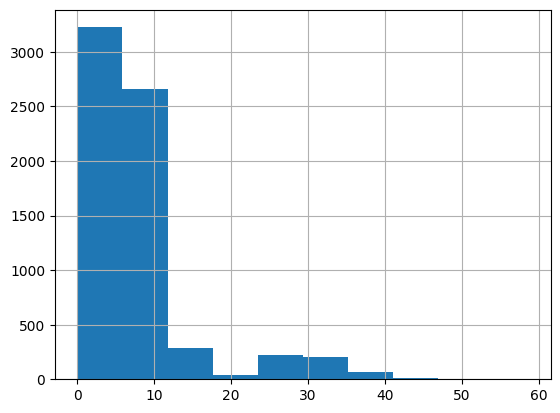

In [89]:
train_data.groupby(by='ODA').ODA_std.mean().hist()

<Axes: >

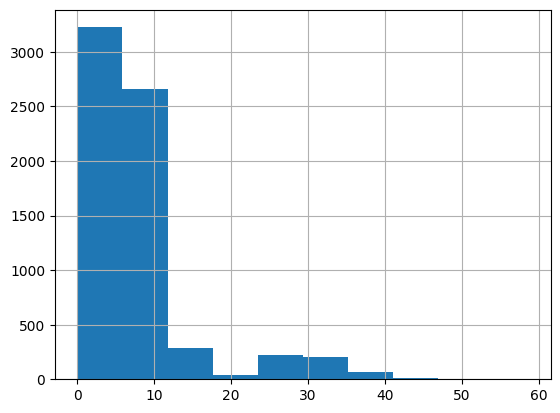

In [90]:
train_data.groupby(by='ODA').ODA_std.mean().hist()

In [91]:
DoAx = ~train_data.Estimated_Departure_Time2.isna() & train_data.Estimated_Arrival_Time2.isna()

In [92]:
(~train_data.Estimated_Departure_Time.isna() & train_data.Estimated_Arrival_Time.isna()).sum()

194832

In [93]:
DoAx.sum()

194832

In [94]:
train_data.loc[DoAx,'Estimated_Arrival_Time'] = (( train_data.loc[DoAx,'Estimated_Departure_Time2'].map(time_to_min) + train_data.loc[DoAx,'ODA_mean'] + (train_data.loc[DoAx,'DA_offset'] * 60) + 24 * 60) % (24 * 60)).map(min_to_time)

In [95]:
train_data['Estimated_Departure_Time2'] = ((train_data.Estimated_Departure_Time.map(time_to_min) - (train_data.OA_offset * 60) + 24 * 60) % (24 * 60)).map(min_to_time)
train_data['Estimated_Arrival_Time2'] = ((train_data.Estimated_Arrival_Time.map(time_to_min) - (train_data.DA_offset * 60) + 24 * 60) % (24 * 60)).map(min_to_time)

In [96]:
train_data[DoAx]

,ID,Month,Day_of_Month,Estimated_Departure_Time,Estimated_Arrival_Time,Origin_Airport,Origin_Airport_ID,Origin_State,Destination_Airport,Destination_Airport_ID,...,Tail_Number,Delay,ODA,OA_offset,DA_offset,Estimated_Departure_Time2,Estimated_Arrival_Time2,Flying_Time,ODA_std,ODA_mean
5,TRAIN_000005,4,13,1545.0,1706.918110,EWR,11618,New Jersey,DCA,11278,...,N657RW,Not_Delayed,EWR_DCA,-5.0,-5.0,2045.0,2206.918110,NaN,5.720865,81.918110
20,TRAIN_000020,7,2,620.0,747.502894,BWI,10821,Maryland,BOS,10721,...,N292WN,NaN,BWI_BOS,-5.0,-5.0,1120.0,1247.502894,NaN,4.835864,87.502894
24,TRAIN_000024,11,28,1030.0,1056.751825,TPA,15304,Florida,BHM,10599,...,N921WN,NaN,TPA_BHM,-5.0,-6.0,1530.0,1656.751825,NaN,3.461513,86.751825
28,TRAIN_000028,8,7,930.0,1046.759303,SAN,14679,California,LAS,12889,...,N628NK,Not_Delayed,SAN_LAS,-8.0,-8.0,1730.0,1846.759303,NaN,7.332213,76.759303
29,TRAIN_000029,10,20,800.0,1042.595238,SEA,14747,Washington,ANC,10299,...,N457AS,NaN,SEA_ANC,-8.0,-9.0,1600.0,1942.595238,NaN,8.101669,222.595238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999931,TEST_999931,11,15,800.0,1043.665370,SEA,14747,Washington,PSP,14262,...,N285AK,NaN,SEA_PSP,-8.0,-8.0,1600.0,1843.665370,NaN,7.285265,163.665370
999933,TEST_999933,3,5,1334.0,1448.485169,DFW,11298,Texas,LIT,12992,...,N602NN,NaN,DFW_LIT,-6.0,-6.0,1934.0,2048.485169,NaN,4.330776,74.485169
999961,TEST_999961,6,2,600.0,713.790244,PHL,14100,Pennsylvania,MDW,13232,...,N8514F,NaN,PHL_MDW,-5.0,-6.0,1100.0,1313.790244,NaN,6.763551,133.790244
999984,TEST_999984,5,31,1045.0,1202.361842,ANC,10299,Alaska,BET,10551,...,N614AS,NaN,ANC_BET,-9.0,-9.0,1945.0,2102.361842,NaN,5.290939,77.361842


In [97]:
DxAo = train_data.Estimated_Departure_Time2.isna() & ~train_data.Estimated_Arrival_Time2.isna()

In [98]:
(train_data.Estimated_Departure_Time.isna() & ~train_data.Estimated_Arrival_Time.isna()).sum()

194387

In [99]:
DxAo.sum()

194387

In [100]:
train_data.loc[DxAo,'Estimated_Departure_Time'] = (( train_data.loc[DxAo,'Estimated_Arrival_Time2'].map(time_to_min) - train_data.loc[DxAo,'ODA_mean'] + (train_data.loc[DxAo,'OA_offset'] * 60) + 24 * 60) % (24 * 60)).map(min_to_time)

In [101]:
train_data['Estimated_Departure_Time2'] = ((train_data.Estimated_Departure_Time.map(time_to_min) - (train_data.OA_offset * 60) + 24 * 60) % (24 * 60)).map(min_to_time)
train_data['Estimated_Arrival_Time2'] = ((train_data.Estimated_Arrival_Time.map(time_to_min) - (train_data.DA_offset * 60) + 24 * 60) % (24 * 60)).map(min_to_time)

In [102]:
len(train_data.dropna())

180262

In [103]:
train_data.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 2000000 entries, 0 to 999999
Data columns (total 25 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   ID                         2000000 non-null  object 
 1   Month                      2000000 non-null  int64  
 2   Day_of_Month               2000000 non-null  int64  
 3   Estimated_Departure_Time   1976376 non-null  float64
 4   Estimated_Arrival_Time     1976374 non-null  float64
 5   Origin_Airport             2000000 non-null  object 
 6   Origin_Airport_ID          2000000 non-null  int64  
 7   Origin_State               2000000 non-null  object 
 8   Destination_Airport        2000000 non-null  object 
 9   Destination_Airport_ID     2000000 non-null  int64  
 10  Destination_State          2000000 non-null  object 
 11  Distance                   2000000 non-null  float64
 12  Airline                    2000000 non-null  object 
 13  Carrier_Code(IATA)

In [104]:
train_data.Estimated_Arrival_Time.isna().sum() # 도착 x

23626

In [105]:
train_data.Estimated_Departure_Time.isna().sum() # 출발 x

23624

In [106]:
DxAx = train_data.Estimated_Departure_Time.isna() | train_data.Estimated_Arrival_Time.isna()

In [107]:
(train_data.Estimated_Departure_Time.isna() | train_data.Estimated_Arrival_Time.isna()).sum() # 둘 중 하나 x

23634

In [108]:
(train_data.Estimated_Departure_Time.isna() * train_data.Estimated_Arrival_Time.isna()).sum() # 둘 다 x

23616

In [109]:
# 둘 중 하나는 있
((train_data.Estimated_Departure_Time.isna() & ~train_data.Estimated_Arrival_Time.isna()) | (~train_data.Estimated_Departure_Time.isna() & train_data.Estimated_Arrival_Time.isna())).sum()

18

In [110]:
# <<중요>> 할일
# 둘다 없는 11688의 경우 그냥 A-to-B 출발 시간의 평균

In [111]:
train_data.loc[:,'Estimated_Arrival_Time3'] = train_data.Estimated_Arrival_Time2.apply(time_to_radians)
train_data.loc[:,'Estimated_Departure_Time3'] = train_data.Estimated_Departure_Time2.apply(time_to_radians)
# 분 -> radian

In [112]:
a3mean = train_data.groupby(by='ODA').Estimated_Arrival_Time3.apply(mean_angle).apply(radians_to_time)
a3std = train_data.groupby(by='ODA').Estimated_Arrival_Time3.apply(std_angle).apply(radians_to_time)
d3mean = train_data.groupby(by='ODA').Estimated_Departure_Time3.apply(mean_angle).apply(radians_to_time)
d3std = train_data.groupby(by='ODA').Estimated_Departure_Time3.apply(std_angle).apply(radians_to_time)

In [113]:
train_data['a3mean'] = train_data.ODA.apply(lambda x :a3mean[x])
train_data['a3std'] = train_data.ODA.apply(lambda x :a3std[x])
train_data['d3mean'] = train_data.ODA.apply(lambda x :d3mean[x])
train_data['d3std'] = train_data.ODA.apply(lambda x :d3std[x])

In [114]:
train_data[(train_data.ODA == 'ABE_ATL')]

,ID,Month,Day_of_Month,Estimated_Departure_Time,Estimated_Arrival_Time,Origin_Airport,Origin_Airport_ID,Origin_State,Destination_Airport,Destination_Airport_ID,...,Estimated_Arrival_Time2,Flying_Time,ODA_std,ODA_mean,Estimated_Arrival_Time3,Estimated_Departure_Time3,a3mean,a3std,d3mean,d3std
912,TRAIN_000912,6,25,1305.0,1514.0,ABE,10135,Pennsylvania,ATL,10397,...,2014.0,129.0,6.948743,133.831169,8.787733,7.875798,126.0,502.0,1422.0,513.0
23683,TRAIN_023683,5,16,610.0,819.0,ABE,10135,Pennsylvania,ATL,10397,...,1319.0,129.0,6.948743,133.831169,5.755223,4.843289,126.0,502.0,1422.0,513.0
28901,TRAIN_028901,3,6,1755.0,2005.0,ABE,10135,Pennsylvania,ATL,10397,...,105.0,130.0,6.948743,133.831169,0.458149,9.839294,126.0,502.0,1422.0,513.0
40880,TRAIN_040880,8,11,1758.0,2009.0,ABE,10135,Pennsylvania,ATL,10397,...,109.0,131.0,6.948743,133.831169,0.475602,9.852384,126.0,502.0,1422.0,513.0
41238,TRAIN_041238,12,2,600.0,813.0,ABE,10135,Pennsylvania,ATL,10397,...,1313.0,133.0,6.948743,133.831169,5.729043,4.799655,126.0,502.0,1422.0,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943480,TEST_943480,3,17,1303.0,1513.0,ABE,10135,Pennsylvania,ATL,10397,...,2013.0,130.0,6.948743,133.831169,8.783369,7.867072,126.0,502.0,1422.0,513.0
944298,TEST_944298,11,17,600.0,813.0,ABE,10135,Pennsylvania,ATL,10397,...,1313.0,133.0,6.948743,133.831169,5.729043,4.799655,126.0,502.0,1422.0,513.0
954891,TEST_954891,3,2,1844.0,2101.0,ABE,10135,Pennsylvania,ATL,10397,...,201.0,137.0,6.948743,133.831169,0.877028,10.227629,126.0,502.0,1422.0,513.0
988759,TEST_988759,12,18,600.0,817.0,ABE,10135,Pennsylvania,ATL,10397,...,1317.0,137.0,6.948743,133.831169,5.746497,4.799655,126.0,502.0,1422.0,513.0


In [115]:
train_data.loc[DxAx,'Estimated_Departure_Time'] = (( train_data.loc[DxAx,'d3mean'].map(time_to_min)  + (train_data.loc[DxAx,'OA_offset'] * 60) + 24 * 60) % (24 * 60)).map(min_to_time)
train_data.loc[DxAx,'Estimated_Arrival_Time'] = (( train_data.loc[DxAx,'a3mean'].map(time_to_min) + (train_data.loc[DxAx,'DA_offset'] * 60) + 24 * 60) % (24 * 60)).map(min_to_time)

In [116]:
train_data.loc[:,train_data.columns[:16]].info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 2000000 entries, 0 to 999999
Data columns (total 16 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   ID                        2000000 non-null  object 
 1   Month                     2000000 non-null  int64  
 2   Day_of_Month              2000000 non-null  int64  
 3   Estimated_Departure_Time  1999992 non-null  float64
 4   Estimated_Arrival_Time    1999989 non-null  float64
 5   Origin_Airport            2000000 non-null  object 
 6   Origin_Airport_ID         2000000 non-null  int64  
 7   Origin_State              2000000 non-null  object 
 8   Destination_Airport       2000000 non-null  object 
 9   Destination_Airport_ID    2000000 non-null  int64  
 10  Destination_State         2000000 non-null  object 
 11  Distance                  2000000 non-null  float64
 12  Airline                   2000000 non-null  object 
 13  Carrier_Code(IATA)        1782017

In [117]:
train_data.loc[:,train_data.columns[:16]]

,ID,Month,Day_of_Month,Estimated_Departure_Time,Estimated_Arrival_Time,Origin_Airport,Origin_Airport_ID,Origin_State,Destination_Airport,Destination_Airport_ID,Destination_State,Distance,Airline,Carrier_Code(IATA),Carrier_ID(DOT),Tail_Number
0,TRAIN_000000,4,15,2300.000000,49.0,OKC,13851,Oklahoma,HOU,12191,Texas,419.0,Southwest Airlines Co.,WN,19393.0,N7858A
1,TRAIN_000001,8,15,740.000000,1024.0,ORD,13930,Illinois,SLC,14869,Utah,1250.0,SkyWest Airlines Inc.,UA,20304.0,N125SY
2,TRAIN_000002,9,6,1610.000000,1805.0,CLT,11057,North Carolina,LGA,12953,New York,544.0,American Airlines Inc.,AA,19805.0,N103US
3,TRAIN_000003,7,10,905.000000,1735.0,LAX,12892,California,EWR,11618,New Jersey,2454.0,United Air Lines Inc.,UA,19977.0,N595UA
4,TRAIN_000004,1,11,900.000000,1019.0,SFO,14771,California,ACV,10157,California,250.0,SkyWest Airlines Inc.,UA,20304.0,N161SY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,TEST_999995,6,2,1917.937534,2240.0,LAX,12892,California,DEN,11292,Colorado,862.0,Southwest Airlines Co.,WN,19393.0,N720WN
999996,TEST_999996,6,8,600.000000,648.0,BUF,10792,New York,ORD,13930,Illinois,473.0,United Air Lines Inc.,UA,19977.0,N401UA
999997,TEST_999997,6,11,1710.000000,1907.0,IAD,12264,Virginia,DTW,11433,Michigan,383.0,Mesa Airlines Inc.,UA,20378.0,N510MJ
999998,TEST_999998,11,17,2028.613861,500.0,SAN,14679,California,BOS,10721,Massachusetts,2588.0,JetBlue Airways,B6,20409.0,N986JB


In [118]:
(train_data.Estimated_Departure_Time.isna() | train_data.Estimated_Arrival_Time.isna()).sum() # 둘 중 하나 x

19

In [119]:
(train_data.Estimated_Departure_Time.isna() * train_data.Estimated_Arrival_Time.isna()).sum() # 둘 다 x

0

In [120]:
# 둘 중 하나는 있
((train_data.Estimated_Departure_Time.isna() & ~train_data.Estimated_Arrival_Time.isna()) | (~train_data.Estimated_Departure_Time.isna() & train_data.Estimated_Arrival_Time.isna())).sum()

19

In [121]:
train_data.loc[:,'Estimated_Departure_Time'].fillna(train_data.loc[:,'Estimated_Departure_Time'].mean(),inplace=True)
train_data.loc[:,'Estimated_Arrival_Time'].fillna(train_data.loc[:,'Estimated_Arrival_Time'].mean(),inplace=True)


In [122]:
train_data.loc[:,train_data.columns[:16]].info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 2000000 entries, 0 to 999999
Data columns (total 16 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   ID                        2000000 non-null  object 
 1   Month                     2000000 non-null  int64  
 2   Day_of_Month              2000000 non-null  int64  
 3   Estimated_Departure_Time  2000000 non-null  float64
 4   Estimated_Arrival_Time    2000000 non-null  float64
 5   Origin_Airport            2000000 non-null  object 
 6   Origin_Airport_ID         2000000 non-null  int64  
 7   Origin_State              2000000 non-null  object 
 8   Destination_Airport       2000000 non-null  object 
 9   Destination_Airport_ID    2000000 non-null  int64  
 10  Destination_State         2000000 non-null  object 
 11  Distance                  2000000 non-null  float64
 12  Airline                   2000000 non-null  object 
 13  Carrier_Code(IATA)        1782017

In [123]:
test_data = train_data.loc[train_data.ID.str.contains('TEST')]
train_data = train_data.loc[train_data.ID.str.contains('TRAIN')]

In [125]:
train_data = train_data.loc[:,['Month','Estimated_Departure_Time','Estimated_Arrival_Time','Origin_Airport_ID','Origin_State','Destination_Airport_ID','Destination_State','Distance','Carrier_ID(DOT)','Tail_Number','Delay']].dropna()

In [126]:
test_data = test_data.loc[:,['Month','Estimated_Departure_Time','Estimated_Arrival_Time','Origin_Airport_ID','Origin_State','Destination_Airport_ID','Destination_State','Distance','Carrier_ID(DOT)','Tail_Number']]